##Instalasi dan impor library


In [ ]:
!pip install google_play_scraper
!pip install textblob
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.0 MB/s eta 0:00:00


In [ ]:
from google_play_scraper import app
import pandas as pd
import numpy as np
import sklearn
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
import textblob
#from wordcloud import WordCloud
from pathlib import Path
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

import pickle
import re
import time
import datetime                              # access to %%time, for timing individual notebook cells
import os
from PIL import Image
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

%matplotlib inline
%config InlineBackend.figure_format='retina'

# Import seaborn styles explicitly
import seaborn as sns
# Apply the seaborn style before creating plots
sns.set_style("whitegrid")  # This line sets the Seaborn style

plt.rcParams["figure.figsize"] = (15,10)

### upload dataset file

In [ ]:
from google.colab import files
uploaded = files.upload()

import io
import pandas as pd

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

  # Assuming the uploaded file is a CSV
  try:
    df_reliverev = pd.read_csv(io.BytesIO(uploaded[fn]))
    print("Successfully loaded CSV into df_reliverev")
  except pd.errors.ParserError:
      print(f"Error: Could not parse {fn} as a CSV. Please upload a valid CSV file.")
      df_reliverev = pd.DataFrame() # Create an empty DataFrame if parsing fails
  except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df_reliverev = pd.DataFrame()


Saving df_reliverev to df_reliverev
User uploaded file "df_reliverev" with length 5535194 bytes
Successfully loaded CSV into df_reliverev


In [ ]:
df_reliverev

reviewId       userName  \
0      71f966cc-b905-4d92-9662-267512516332  A Google user   
1      7554edbe-d8bc-4a4a-aaa7-3d9c7112a493  A Google user   
2      2eaa87c0-38d1-4a23-a7c7-81a74dda90ca  A Google user   
3      bfecffd5-233c-48c0-8b70-7fc1cf66912a  A Google user   
4      d238c089-b972-4155-abdb-b26a5f285134  A Google user   
...                                     ...            ...   
21616  bf98d323-2b31-4df8-a3f7-446e0d00748e  A Google user   
21617  903af083-7b12-4708-bc25-31c779b4ff6d  A Google user   
21618  44ed2bef-eca5-4b36-93e2-dde154698632  A Google user   
21619  a77422c6-b008-484f-a1a8-5a816fbd9397  A Google user   
21620  cbc0006c-a2c2-49f3-8dff-974061c784d4  A Google user   

                                               userImage  \
0      https://play-lh.googleusercontent.com/EGemoI2N...   
1      https://play-lh.googleusercontent.com/EGemoI2N...   
2      https://play-lh.googleusercontent.com/EGemoI2N...   
3      https://play-lh.googleusercontent.com/EGemoI2N...   
4      https://play-lh.googleusercontent.com/EGemoI2N...   
...                                                  ...   
21616  https://play-lh.googleusercontent.com/EGemoI2N...   
21617  https://play-lh.googleusercontent.com/EGemoI2N...   
21618  https://play-lh.googleusercontent.com/EGemoI2N...   
21619  https://play-lh.googleusercontent.com/EGemoI2N...   
21620  https://play-lh.googleusercontent.com/EGemoI2N...   

                                                 content  score  \
0      Good app, but I wish for upgrade in UI and som...      4   
1                                       accurate details      4   
2      Paid for this last year at 50% off, its just r...      2   
3      It's a very good application for me, so try it...      5   
4                                                  Ohsem      5   
...                                                  ...    ...   
21616                         Awesome.. has all my rides      5   
21617                                 So far, very good.      5   
21618                        Love the app. Fantastic....      5   
21619  Brilliant, just what was needed adding the app...      5   
21620                                     It's amazing 😃      5   

       thumbsUpCount reviewCreatedVersion                   at replyContent  \
0                  0               5.57.0  2025-03-11 11:58:45          NaN   
1                  0               5.57.0  2025-03-11 00:24:19          NaN   
2                  0               5.57.0  2025-03-10 14:14:45          NaN   
3                  0               5.57.0  2025-03-10 12:45:46          NaN   
4                  0               5.57.0  2025-03-09 05:45:56          NaN   
...              ...                  ...                  ...          ...   
21616              0                  1.0  2017-03-26 05:55:08          NaN   
21617              0                  1.0  2017-03-26 01:39:03          NaN   
21618              0                  1.0  2017-03-25 08:24:47          NaN   
21619              1                  1.0  2017-03-23 18:20:09          NaN   
21620              0                  NaN  2017-03-23 15:06:19          NaN   

      repliedAt appVersion  
0           NaN     5.57.0  
1           NaN     5.57.0  
2           NaN     5.57.0  
3           NaN     5.57.0  
4           NaN     5.57.0  
...         ...        ...  
21616       NaN        1.0  
21617       NaN        1.0  
21618       NaN        1.0  
21619       NaN        1.0  
21620       NaN        NaN  

[21621 rows x 11 columns]

In [ ]:
df_reliverev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21621 entries, 0 to 21620
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              21621 non-null  object
 1   userName              21621 non-null  object
 2   userImage             21621 non-null  object
 3   content               21619 non-null  object
 4   score                 21621 non-null  int64 
 5   thumbsUpCount         21621 non-null  int64 
 6   reviewCreatedVersion  20363 non-null  object
 7   at                    21621 non-null  object
 8   replyContent          653 non-null    object
 9   repliedAt             653 non-null    object
 10  appVersion            20363 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.8+ MB


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

# Download english stopwords if not available
nltk.download('stopwords')
english_stopwords = set(stopwords.words('english'))

# Assuming the text column is named 'text', update accordingly
text_column = 'content'  # Change this if the column has a different name

# Combine all text data into one string
all_text = ' '.join(df_reliverev[text_column].dropna().astype(str))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#We do not need data for column reviewId, userName, userImage so
#we will show only these column
df_reliverev.loc[:,["content","score","thumbsUpCount", "reviewCreatedVersion", "at", "replyContent", "repliedAt"]]

content  score  \
0      Good app, but I wish for upgrade in UI and som...      4   
1                                       accurate details      4   
2      Paid for this last year at 50% off, its just r...      2   
3      It's a very good application for me, so try it...      5   
4                                                  Ohsem      5   
...                                                  ...    ...   
21616                         Awesome.. has all my rides      5   
21617                                 So far, very good.      5   
21618                        Love the app. Fantastic....      5   
21619  Brilliant, just what was needed adding the app...      5   
21620                                     It's amazing 😃      5   

       thumbsUpCount reviewCreatedVersion                   at replyContent  \
0                  0               5.57.0  2025-03-11 11:58:45          NaN   
1                  0               5.57.0  2025-03-11 00:24:19          NaN   
2                  0               5.57.0  2025-03-10 14:14:45          NaN   
3                  0               5.57.0  2025-03-10 12:45:46          NaN   
4                  0               5.57.0  2025-03-09 05:45:56          NaN   
...              ...                  ...                  ...          ...   
21616              0                  1.0  2017-03-26 05:55:08          NaN   
21617              0                  1.0  2017-03-26 01:39:03          NaN   
21618              0                  1.0  2017-03-25 08:24:47          NaN   
21619              1                  1.0  2017-03-23 18:20:09          NaN   
21620              0                  NaN  2017-03-23 15:06:19          NaN   

      repliedAt  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  
...         ...  
21616       NaN  
21617       NaN  
21618       NaN  
21619       NaN  
21620       NaN  

[21621 rows x 7 columns]

## Tokenization


In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# Download punkt if not already present
nltk.download('punkt')
nltk.download('punkt_tab') # Download the punkt_tab resource

def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

# Apply tokenization to the 'content' column
df_reliverev['tokenized_content'] = df_reliverev['content'].astype(str).apply(tokenize_text)

# Display the DataFrame with the new 'tokenized_content' column
df_reliverev[['content', 'tokenized_content']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


content  \
0      Good app, but I wish for upgrade in UI and som...   
1                                       accurate details   
2      Paid for this last year at 50% off, its just r...   
3      It's a very good application for me, so try it...   
4                                                  Ohsem   
...                                                  ...   
21616                         Awesome.. has all my rides   
21617                                 So far, very good.   
21618                        Love the app. Fantastic....   
21619  Brilliant, just what was needed adding the app...   
21620                                     It's amazing 😃   

                                       tokenized_content  
0      [Good, app, ,, but, I, wish, for, upgrade, in,...  
1                                    [accurate, details]  
2      [Paid, for, this, last, year, at, 50, %, off, ...  
3      [It, 's, a, very, good, application, for, me, ...  
4                                                [Ohsem]  
...                                                  ...  
21616                 [Awesome, .., has, all, my, rides]  
21617                        [So, far, ,, very, good, .]  
21618               [Love, the, app, ., Fantastic, ....]  
21619  [Brilliant, ,, just, what, was, needed, adding...  
21620                               [It, 's, amazing, 😃]  

[21621 rows x 2 columns]

##Lowering case

In [ ]:
def lower_tokenized(tokens):
    return [token.lower() for token in tokens]

df_reliverev['lower_tokenized_content'] = df_reliverev['tokenized_content'].apply(lower_tokenized)
df_reliverev[['tokenized_content', 'lower_tokenized_content']]

tokenized_content  \
0      [Good, app, ,, but, I, wish, for, upgrade, in,...   
1                                    [accurate, details]   
2      [Paid, for, this, last, year, at, 50, %, off, ...   
3      [It, 's, a, very, good, application, for, me, ...   
4                                                [Ohsem]   
...                                                  ...   
21616                 [Awesome, .., has, all, my, rides]   
21617                        [So, far, ,, very, good, .]   
21618               [Love, the, app, ., Fantastic, ....]   
21619  [Brilliant, ,, just, what, was, needed, adding...   
21620                               [It, 's, amazing, 😃]   

                                 lower_tokenized_content  
0      [good, app, ,, but, i, wish, for, upgrade, in,...  
1                                    [accurate, details]  
2      [paid, for, this, last, year, at, 50, %, off, ...  
3      [it, 's, a, very, good, application, for, me, ...  
4                                                [ohsem]  
...                                                  ...  
21616                 [awesome, .., has, all, my, rides]  
21617                        [so, far, ,, very, good, .]  
21618               [love, the, app, ., fantastic, ....]  
21619  [brilliant, ,, just, what, was, needed, adding...  
21620                               [it, 's, amazing, 😃]  

[21621 rows x 2 columns]

##Stopwords Removal
English Stopwords

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Get English stopwords
english_stopwords = stopwords.words('english')  # Change to 'english'

# Display first 20 stopwords
print(english_stopwords[:20])

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(len(english_stopwords))

198


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(
    max_df=0.85,  # Exclude words that appear in more than 85% of documents
    min_df=2,     # Exclude words that appear in less than 2 documents
    ngram_range=(1, 2)  # Consider unigrams and bigrams
)

X_tfidf = tfidf_vectorizer.fit_transform(corpus)  # 'corpus' is your list of text documents


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

# Assuming the text column is named 'text', update accordingly
text_column = 'content'  # Change this if the column has a different name

# Combine all text data into one string
all_text = ' '.join(df_reliverev[text_column].dropna().astype(str))

# Tokenize words and remove stopwords
words = all_text.split()
filtered_words = [word.lower() for word in words if word.lower() not in english_stopwords]

# Count frequent words
word_counts = Counter(filtered_words)
common_words = word_counts.most_common(1000)

# Convert to DataFrame for better visualization
word_freq_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Display the most common words
display(word_freq_df)

# Plot the frequent words
# plt.figure(figsize=(19, 12))
# plt.barh(word_freq_df['Word'][::-1], word_freq_df['Frequency'][::-1])
# plt.xlabel("Frequency")
# plt.ylabel("Words")
# plt.title("Top 20 Most Frequent Words (Excluding Stopwords)")
# plt.show()

Word  Frequency
0             app       4765
1            good       3245
2           great       2412
3            nice       2189
4            love       1358
..            ...        ...
995         loads         13
996      fabulous         13
997       good...         13
998           nya         13
999  entertaining         13

[1000 rows x 2 columns]

In [ ]:
#common_words

In [ ]:
# prompt: nltk.download('stopwords')
# english_stopwords = set(stopwords.words('english'))
# custom_stopwords = ["عالی", "garmin", "de", "nya", "la", "n", "u", "guys", "too",
#                     "muy", "na", "sangat", "although", "oke", "on", "them", "dan",
#                     "e", "yg", "se", "un", "le", "and", "dengan", "tidak", "de", "say", "upload"]
# # 2. Gabungkan stopwords bawaan dan custom stopwords
# all_stopwords = english_stopwords.union(custom_stopwords)
# lengkapilah kode berikut untuk remove all stopwords

def remove_stopwords(tokens):
    return [token for token in tokens if token not in all_stopwords]


df_reliverev['removed_stopwords_content'] = df_reliverev['lower_tokenized_content'].apply(remove_stopwords)
df_reliverev[['lower_tokenized_content', 'removed_stopwords_content']]


lower_tokenized_content  \
0      [good, app, ,, but, i, wish, for, upgrade, in,...   
1                                    [accurate, details]   
2      [paid, for, this, last, year, at, 50, %, off, ...   
3      [it, 's, a, very, good, application, for, me, ...   
4                                                [ohsem]   
...                                                  ...   
21616                 [awesome, .., has, all, my, rides]   
21617                        [so, far, ,, very, good, .]   
21618               [love, the, app, ., fantastic, ....]   
21619  [brilliant, ,, just, what, was, needed, adding...   
21620                               [it, 's, amazing, 😃]   

                               removed_stopwords_content  
0      [good, app, ,, wish, upgrade, ui, features, so...  
1                                    [accurate, details]  
2      [paid, last, year, 50, %, ,, renewed, @, £32, ...  
3                 ['s, good, application, ,, try, folks]  
4                                                [ohsem]  
...                                                  ...  
21616                               [awesome, .., rides]  
21617                                  [far, ,, good, .]  
21618                    [love, app, ., fantastic, ....]  
21619  [brilliant, ,, needed, adding, app, ., nothing...  
21620                                   ['s, amazing, 😃]  

[21621 rows x 2 columns]

In [ ]:
print(df_reliverev['lower_tokenized_content'][5000])
print(df_reliverev['removed_stopwords_content'][5000])

['beautiful', 'and', 'helpful', 'app', 'audio', 'options', 'should', 'be', 'more', 'and', 'there', 'shouldnt', 'be', 'any', 'limit', 'for', 'size']
['beautiful', 'helpful', 'app', 'audio', 'options', 'shouldnt', 'limit', 'size']


##Lemmatization

In [ ]:
# prompt: buatkan kode untuk lemmatization

import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_text(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

df_reliverev['lemmatized_content'] = df_reliverev['removed_stopwords_content'].apply(lemmatize_text)
df_reliverev[['removed_stopwords_content', 'lemmatized_content']]


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


removed_stopwords_content  \
0      [good, app, ,, wish, upgrade, ui, features, so...   
1                                    [accurate, details]   
2      [paid, last, year, 50, %, ,, renewed, @, £32, ...   
3                 ['s, good, application, ,, try, folks]   
4                                                [ohsem]   
...                                                  ...   
21616                               [awesome, .., rides]   
21617                                  [far, ,, good, .]   
21618                    [love, app, ., fantastic, ....]   
21619  [brilliant, ,, needed, adding, app, ., nothing...   
21620                                   ['s, amazing, 😃]   

                                      lemmatized_content  
0      [good, app, ,, wish, upgrade, ui, feature, soo...  
1                                     [accurate, detail]  
2      [paid, last, year, 50, %, ,, renewed, @, £32, ...  
3                  ['s, good, application, ,, try, folk]  
4                                                [ohsem]  
...                                                  ...  
21616                                [awesome, .., ride]  
21617                                  [far, ,, good, .]  
21618                    [love, app, ., fantastic, ....]  
21619  [brilliant, ,, needed, adding, app, ., nothing...  
21620                                   ['s, amazing, 😃]  

[21621 rows x 2 columns]

In [ ]:
print(df_reliverev['removed_stopwords_content'][21619])
print(df_reliverev['lemmatized_content'][21619])

['brilliant', ',', 'needed', 'adding', 'app', '.', 'nothing', 'praise', 'team', 'relive', '.', 'thanks', 'guys', ',', 'onward', 'upward', '!', '!']
['brilliant', ',', 'needed', 'adding', 'app', '.', 'nothing', 'praise', 'team', 'relive', '.', 'thanks', 'guy', ',', 'onward', 'upward', '!', '!']


##Stemming

In [ ]:
# prompt: buatkan kode untuk stemming

import nltk
from nltk.stem import PorterStemmer

nltk.download('punkt')

stemmer = PorterStemmer()

def stem_text(tokens):
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

df_reliverev['stemmed_content'] = df_reliverev['lemmatized_content'].apply(stem_text)
df_reliverev[['lemmatized_content', 'stemmed_content']]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


lemmatized_content  \
0      [good, app, ,, wish, upgrade, ui, feature, soo...   
1                                     [accurate, detail]   
2      [paid, last, year, 50, %, ,, renewed, @, £32, ...   
3                  ['s, good, application, ,, try, folk]   
4                                                [ohsem]   
...                                                  ...   
21616                                [awesome, .., ride]   
21617                                  [far, ,, good, .]   
21618                    [love, app, ., fantastic, ....]   
21619  [brilliant, ,, needed, adding, app, ., nothing...   
21620                                   ['s, amazing, 😃]   

                                         stemmed_content  
0      [good, app, ,, wish, upgrad, ui, featur, soon, .]  
1                                        [accur, detail]  
2      [paid, last, year, 50, %, ,, renew, @, £32, wa...  
3                       ['s, good, applic, ,, tri, folk]  
4                                                [ohsem]  
...                                                  ...  
21616                                 [awesom, .., ride]  
21617                                  [far, ,, good, .]  
21618                      [love, app, ., fantast, ....]  
21619  [brilliant, ,, need, ad, app, ., noth, prais, ...  
21620                                      ['s, amaz, 😃]  

[21621 rows x 2 columns]

In [ ]:
print(df_reliverev['lemmatized_content'][21619])
print(df_reliverev['stemmed_content'][21619])

['brilliant', ',', 'needed', 'adding', 'app', '.', 'nothing', 'praise', 'team', 'relive', '.', 'thanks', 'guy', ',', 'onward', 'upward', '!', '!']
['brilliant', ',', 'need', 'ad', 'app', '.', 'noth', 'prais', 'team', 'reliv', '.', 'thank', 'guy', ',', 'onward', 'upward', '!', '!']


##Punctuation Removal

In [ ]:
import string

def remove_punctuation(text):
    if isinstance(text, str):
        translator = str.maketrans('', '', string.punctuation)
        cleaned_text = text.translate(translator)
        return cleaned_text
    else:
        return text

df_reliverev['stemmed_content'] = df_reliverev['stemmed_content'].astype(str)
df_reliverev['cleaned_content'] = df_reliverev['stemmed_content'].apply(remove_punctuation)
df_reliverev[['stemmed_content', 'cleaned_content']]

stemmed_content  \
0      ['good', 'app', ',', 'wish', 'upgrad', 'ui', '...   
1                                    ['accur', 'detail']   
2      ['paid', 'last', 'year', '50', '%', ',', 'rene...   
3           ["'s", 'good', 'applic', ',', 'tri', 'folk']   
4                                              ['ohsem']   
...                                                  ...   
21616                           ['awesom', '..', 'ride']   
21617                          ['far', ',', 'good', '.']   
21618            ['love', 'app', '.', 'fantast', '....']   
21619  ['brilliant', ',', 'need', 'ad', 'app', '.', '...   
21620                                ["'s", 'amaz', '😃']   

                                         cleaned_content  
0                  good app  wish upgrad ui featur soon   
1                                           accur detail  
2      paid last year 50   renew  £32 warn whatsoev r...  
3                                s good applic  tri folk  
4                                                  ohsem  
...                                                  ...  
21616                                       awesom  ride  
21617                                         far  good   
21618                                 love app  fantast   
21619  brilliant  need ad app  noth prais team reliv ...  
21620                                           s amaz 😃  

[21621 rows x 2 columns]

##Expand Contractions

In [ ]:
!pip install contractions
import contractions

def expand_contractions(text):
    # Check if the input is a string before attempting to expand contractions
    if isinstance(text, str):
        expanded_text = contractions.fix(text)
        return expanded_text
    else:
        # Return the original value if it's not a string (e.g., NaN)
        return text

# Apply the function to the 'cleaned_content' column
df_reliverev['expanded_cleaned_content'] = df_reliverev['cleaned_content'].apply(expand_contractions)

# Display the DataFrame with the original and expanded columns
df_reliverev[['cleaned_content', 'expanded_cleaned_content']]

cleaned_content  \
0                  good app  wish upgrad ui featur soon    
1                                           accur detail   
2      paid last year 50   renew  £32 warn whatsoev r...   
3                                s good applic  tri folk   
4                                                  ohsem   
...                                                  ...   
21616                                       awesom  ride   
21617                                         far  good    
21618                                 love app  fantast    
21619  brilliant  need ad app  noth prais team reliv ...   
21620                                           s amaz 😃   

                                expanded_cleaned_content  
0                  good app  wish upgrad ui featur soon   
1                                           accur detail  
2      paid last year 50   renew  £32 warn whatsoev r...  
3                                s good applic  tri folk  
4                                                  ohsem  
...                                                  ...  
21616                                       awesom  ride  
21617                                         far  good   
21618                                 love app  fantast   
21619  brilliant  need ad app  noth prais team reliv ...  
21620                                           s amaz 😃  

[21621 rows x 2 columns]

In [ ]:
print(df_reliverev['cleaned_content'][5000])
print(df_reliverev['expanded_cleaned_content'][5000])

beauti help app audio option shouldnt limit size
beauti help app audio option should not limit size


##Spelling Corection

In [ ]:
!pip install symspellpy  # Install if not already installed
import pkg_resources
from symspellpy import SymSpell, Verbosity
import nltk
from nltk.tokenize import word_tokenize
import re

# Download resources if not already present
nltk.download('punkt')
nltk.download('popular')

# Load dictionary (adjust paths if necessary)
dictionary_path = pkg_resources.resource_filename(
    "symspellpy", "frequency_dictionary_en_82_765.txt"
)
bigram_path = pkg_resources.resource_filename(
    "symspellpy", "frequency_bigramdictionary_en_243_342.txt"
)

# Initialize SymSpell with adjusted parameters
sym_spell = SymSpell(max_dictionary_edit_distance=3, prefix_length=7)  # Increased max_edit_distance
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)
sym_spell.load_bigram_dictionary(bigram_path, term_index=0, count_index=2)

def enhanced_correct_spelling(text):
    # 1. More aggressive preprocessing
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove non-alphanumeric characters except spaces
    words = word_tokenize(text.lower())  # Tokenize and lowercase

    # 2. Spelling correction with SymSpell
    corrected_words = []
    for word in words:
        suggestions = sym_spell.lookup(word, Verbosity.CLOSEST, max_edit_distance=3)  # Increased max_edit_distance here as well
        if suggestions:
            corrected_words.append(suggestions[0].term)
        else:
            corrected_words.append(word)

    corrected_text = " ".join(corrected_words)

    # 3. Context-dependent correction (unchanged)
    suggestions = sym_spell.lookup_compound(corrected_text, max_edit_distance=2)
    if suggestions:
        return suggestions[0].term
    else:
        return corrected_text

# Apply spelling correction to the 'expanded_cleaned_content' column
df_reliverev['spell_corrected_content'] = df_reliverev['expanded_cleaned_content'].astype(str).apply(enhanced_correct_spelling)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading 

In [ ]:
df_reliverev[['spell_corrected_content', 'expanded_cleaned_content']]

spell_corrected_content  \
0                   good app wish upgrade i feature soon   
1                                           occur detail   
2      paid last year renew warn whatsoever refund ac...   
3                                  a good apply try folk   
4                                                   them   
...                                                  ...   
21616                                       awesome ride   
21617                                           far good   
21618                                   love app fantast   
21619  brilliant need and app not paris team relic th...   
21620                                            a amaze   

                                expanded_cleaned_content  
0                  good app  wish upgrad ui featur soon   
1                                           accur detail  
2      paid last year 50   renew  £32 warn whatsoev r...  
3                                s good applic  tri folk  
4                                                  ohsem  
...                                                  ...  
21616                                       awesom  ride  
21617                                         far  good   
21618                                 love app  fantast   
21619  brilliant  need ad app  noth prais team reliv ...  
21620                                           s amaz 😃  

[21621 rows x 2 columns]

In [ ]:
# prompt: buatkan kode untuk rare words removal, yang cara kerjanya mirp contoh berikut
# from collections import Counter
# def remove_rare_words(words, threshold=1):
#     word_counts = Counter(words)
#     return [word for word in words if word_counts[word] > threshold]
# words = ["apple", "quizzaciously", "dog", "hitherto", "supercalifragilisticexpialidocious", "apple", "dog"]
# print(remove_rare_words(words))
# namun diubah dalam konteks df_reliverev, lanjutkan dari spell_corrected_content

from collections import Counter

def remove_rare_words_from_df(df, column_name, threshold=50):
    # Combine all text data from the specified column into a single string
    all_text = ' '.join(df[column_name].dropna().astype(str))
    words = all_text.split()

    # Count word frequencies
    word_counts = Counter(words)

    # Function to filter rare words from a list of words
    def filter_rare_words(text):
        if isinstance(text, str):
          tokens = text.split()
          filtered_tokens = [word for word in tokens if word_counts[word] > threshold]
          return " ".join(filtered_tokens)
        elif isinstance(text, list):
          filtered_tokens = [word for word in text if word_counts[word] > threshold]
          return filtered_tokens
        else:
          return text

    # Apply the filtering function to the specified column
    df[f'{column_name}_no_rare'] = df[column_name].apply(filter_rare_words)
    return df


# Example usage:
df_reliverev = remove_rare_words_from_df(df_reliverev, 'spell_corrected_content', threshold=50) # Adjust threshold as needed
df_reliverev[['spell_corrected_content', 'spell_corrected_content_no_rare']]


spell_corrected_content  \
0                   good app wish upgrade i feature soon   
1                                           occur detail   
2      paid last year renew warn whatsoever refund ac...   
3                                  a good apply try folk   
4                                                   them   
...                                                  ...   
21616                                       awesome ride   
21617                                           far good   
21618                                   love app fantast   
21619  brilliant need and app not paris team relic th...   
21620                                            a amaze   

                  spell_corrected_content_no_rare  
0            good app wish upgrade i feature soon  
1                                           occur  
2            paid last year refund email absolute  
3                                a good apply try  
4                                                  
...                                           ...  
21616                                awesome ride  
21617                                    far good  
21618                            love app fantast  
21619  brilliant need and app not relic thank guy  
21620                                     a amaze  

[21621 rows x 2 columns]

##Common Words

In [ ]:
# prompt: remove common words tapi tetap simpan adjective yang ada di filtered_content

from nltk.corpus import stopwords
from nltk.tag import pos_tag
import nltk
import string

nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

# ... (Your existing code) ...

# 1. Dapatkan stopwords bawaan dan definisikan custom stopwords
english_stopwords = set(stopwords.words('english'))
custom_stopwords = ["your", "custom", "stopwords", "here"]  # Add your custom stopwords here
all_stopwords = english_stopwords.union(custom_stopwords)

def remove_common_words_keep_adj(text):
    # Tokenize the text if it's a string
    if isinstance(text, str):
        tokens = text.split()
    else:
        tokens = text  # Assume it's already tokenized if it's not a string

    filtered_tokens = []
    for token, tag in pos_tag(tokens):
        if tag.startswith('JJ'):  # Keep adjectives
            filtered_tokens.append(token)
        elif token.lower() not in all_stopwords:
            filtered_tokens.append(token)

    # Join the filtered tokens back into a string if the input was a string
    if isinstance(text, str):
        return " ".join(filtered_tokens)
    else:
        return filtered_tokens

df_reliverev['spell_corrected_content_no_rare_no_common'] = df_reliverev['spell_corrected_content_no_rare'].apply(remove_common_words_keep_adj)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
# from collections import Counter

# def remove_common_words_from_df(df, column_name, threshold=3):  # Change to threshold

#     # Combine all text data into one string
#     all_text = ' '.join(df[column_name].dropna().astype(str))

#     # Tokenize words
#     words = all_text.split()

#     # Count word frequencies
#     word_counts = Counter(words)

#     # Get common words above the threshold
#     common_words = set([word for word, count in word_counts.items() if count > threshold])

#     # Function to remove common words
#     def remove_words(text):
#       if isinstance(text, str):
#         return ' '.join([word for word in text.split() if word not in common_words])
#       elif isinstance(text, list):
#         return [word for word in text if word not in common_words]
#       else:
#           return text

#     # Apply the function
#     df[f'{column_name}_no_common'] = df[column_name].apply(remove_words)

#     return df

#     df_reliverev = remove_common_words_from_df(df_reliverev, 'spell_corrected_content_no_rare', threshold=3)  # Use threshold




In [ ]:
df_reliverev[['spell_corrected_content_no_rare', 'spell_corrected_content_no_rare_no_common']]

spell_corrected_content_no_rare  \
0            good app wish upgrade i feature soon   
1                                           occur   
2            paid last year refund email absolute   
3                                a good apply try   
4                                                   
...                                           ...   
21616                                awesome ride   
21617                                    far good   
21618                            love app fantast   
21619  brilliant need and app not relic thank guy   
21620                                     a amaze   

      spell_corrected_content_no_rare_no_common  
0            good app wish upgrade feature soon  
1                                         occur  
2          paid last year refund email absolute  
3                                good apply try  
4                                                
...                                         ...  
21616                              awesome ride  
21617                                  far good  
21618                          love app fantast  
21619        brilliant need app relic thank guy  
21620                                     amaze  

[21621 rows x 2 columns]

In [ ]:
# prompt: buatkan kode yang menghitung perbedaan kata pada spell_corrected_content_no_rare d engan spell_corrected_content_no_rare_no_common

def calculate_word_difference(text1, text2):
  """
  Calculates the difference in words between two strings.

  Args:
    text1: The first string.
    text2: The second string.

  Returns:
    A set containing words present in text1 but not in text2.
  """
  if isinstance(text1, str) and isinstance(text2, str):
    words1 = set(text1.split())
    words2 = set(text2.split())
    return words1.difference(words2)
  else:
    return set()  # Return an empty set if either input is not a string


df_reliverev['word_difference'] = df_reliverev.apply(
    lambda row: calculate_word_difference(
        row['spell_corrected_content_no_rare'],
        row['spell_corrected_content_no_rare_no_common']
    ),
    axis=1
)

# Display the DataFrame with the new 'word_difference' column
df_reliverev[['spell_corrected_content_no_rare', 'spell_corrected_content_no_rare_no_common', 'word_difference']]


spell_corrected_content_no_rare  \
0            good app wish upgrade i feature soon   
1                                           occur   
2            paid last year refund email absolute   
3                                a good apply try   
4                                                   
...                                           ...   
21616                                awesome ride   
21617                                    far good   
21618                            love app fantast   
21619  brilliant need and app not relic thank guy   
21620                                     a amaze   

      spell_corrected_content_no_rare_no_common word_difference  
0            good app wish upgrade feature soon             {i}  
1                                         occur              {}  
2          paid last year refund email absolute              {}  
3                                good apply try             {a}  
4                                                            {}  
...                                         ...             ...  
21616                              awesome ride              {}  
21617                                  far good              {}  
21618                          love app fantast              {}  
21619        brilliant need app relic thank guy      {and, not}  
21620                                     amaze             {a}  

[21621 rows x 3 columns]

In [ ]:
# prompt: buatkan kode untuk hitung total word different

from collections import Counter

def calculate_total_different_words(df, column_name):
  """
  Calculates the total number of different words in a specified DataFrame column.

  Args:
    df: The DataFrame containing the text data.
    column_name: The name of the column with text data.

  Returns:
    The total number of unique words in the specified column.
  """

  all_words = []
  for text in df[column_name].dropna():
    if isinstance(text, str):
      all_words.extend(text.split())

  word_counts = Counter(all_words)
  return len(word_counts)

# Example usage:
total_different_words = calculate_total_different_words(df_reliverev, 'spell_corrected_content_no_rare_no_common')
print(f"Total different words in 'spell_corrected_content_no_rare_no_common': {total_different_words}")


Total different words in 'spell_corrected_content_no_rare_no_common': 304


#Sentiment Analysis

In [ ]:
from textblob import TextBlob
# Handle None values in 'content' column by replacing them with empty strings
df_reliverev['sentiment_polarity'] = df_reliverev['spell_corrected_content_no_rare_no_common'].astype(str).apply(lambda x: TextBlob(x).polarity)
df_reliverev['sentiment_subjective'] = df_reliverev['spell_corrected_content_no_rare_no_common'].astype(str).apply(lambda x: TextBlob(x).subjectivity)

In [ ]:

df_reliverev['sentiment_rating'] = df_reliverev['score'].apply(lambda x: 'Positive' if x > 3 else('Neutral' if x == 3  else 'Negative'))

In [ ]:
df_reliverev.loc[:,["spell_corrected_content_no_rare_no_common","score","sentiment_polarity", "sentiment_subjective","sentiment_rating"]]

spell_corrected_content_no_rare_no_common  score  sentiment_polarity  \
0            good app wish upgrade feature soon      4                 0.7   
1                                         occur      4                 0.0   
2          paid last year refund email absolute      2                 0.1   
3                                good apply try      5                 0.7   
4                                                    5                 0.0   
...                                         ...    ...                 ...   
21616                              awesome ride      5                 1.0   
21617                                  far good      5                 0.4   
21618                          love app fantast      5                 0.5   
21619        brilliant need app relic thank guy      5                 0.9   
21620                                     amaze      5                 0.0   

       sentiment_subjective sentiment_rating  
0                  0.600000         Positive  
1                  0.000000         Positive  
2                  0.483333         Negative  
3                  0.600000         Positive  
4                  0.000000         Positive  
...                     ...              ...  
21616              1.000000         Positive  
21617              0.800000         Positive  
21618              0.600000         Positive  
21619              1.000000         Positive  
21620              0.000000         Positive  

[21621 rows x 5 columns]

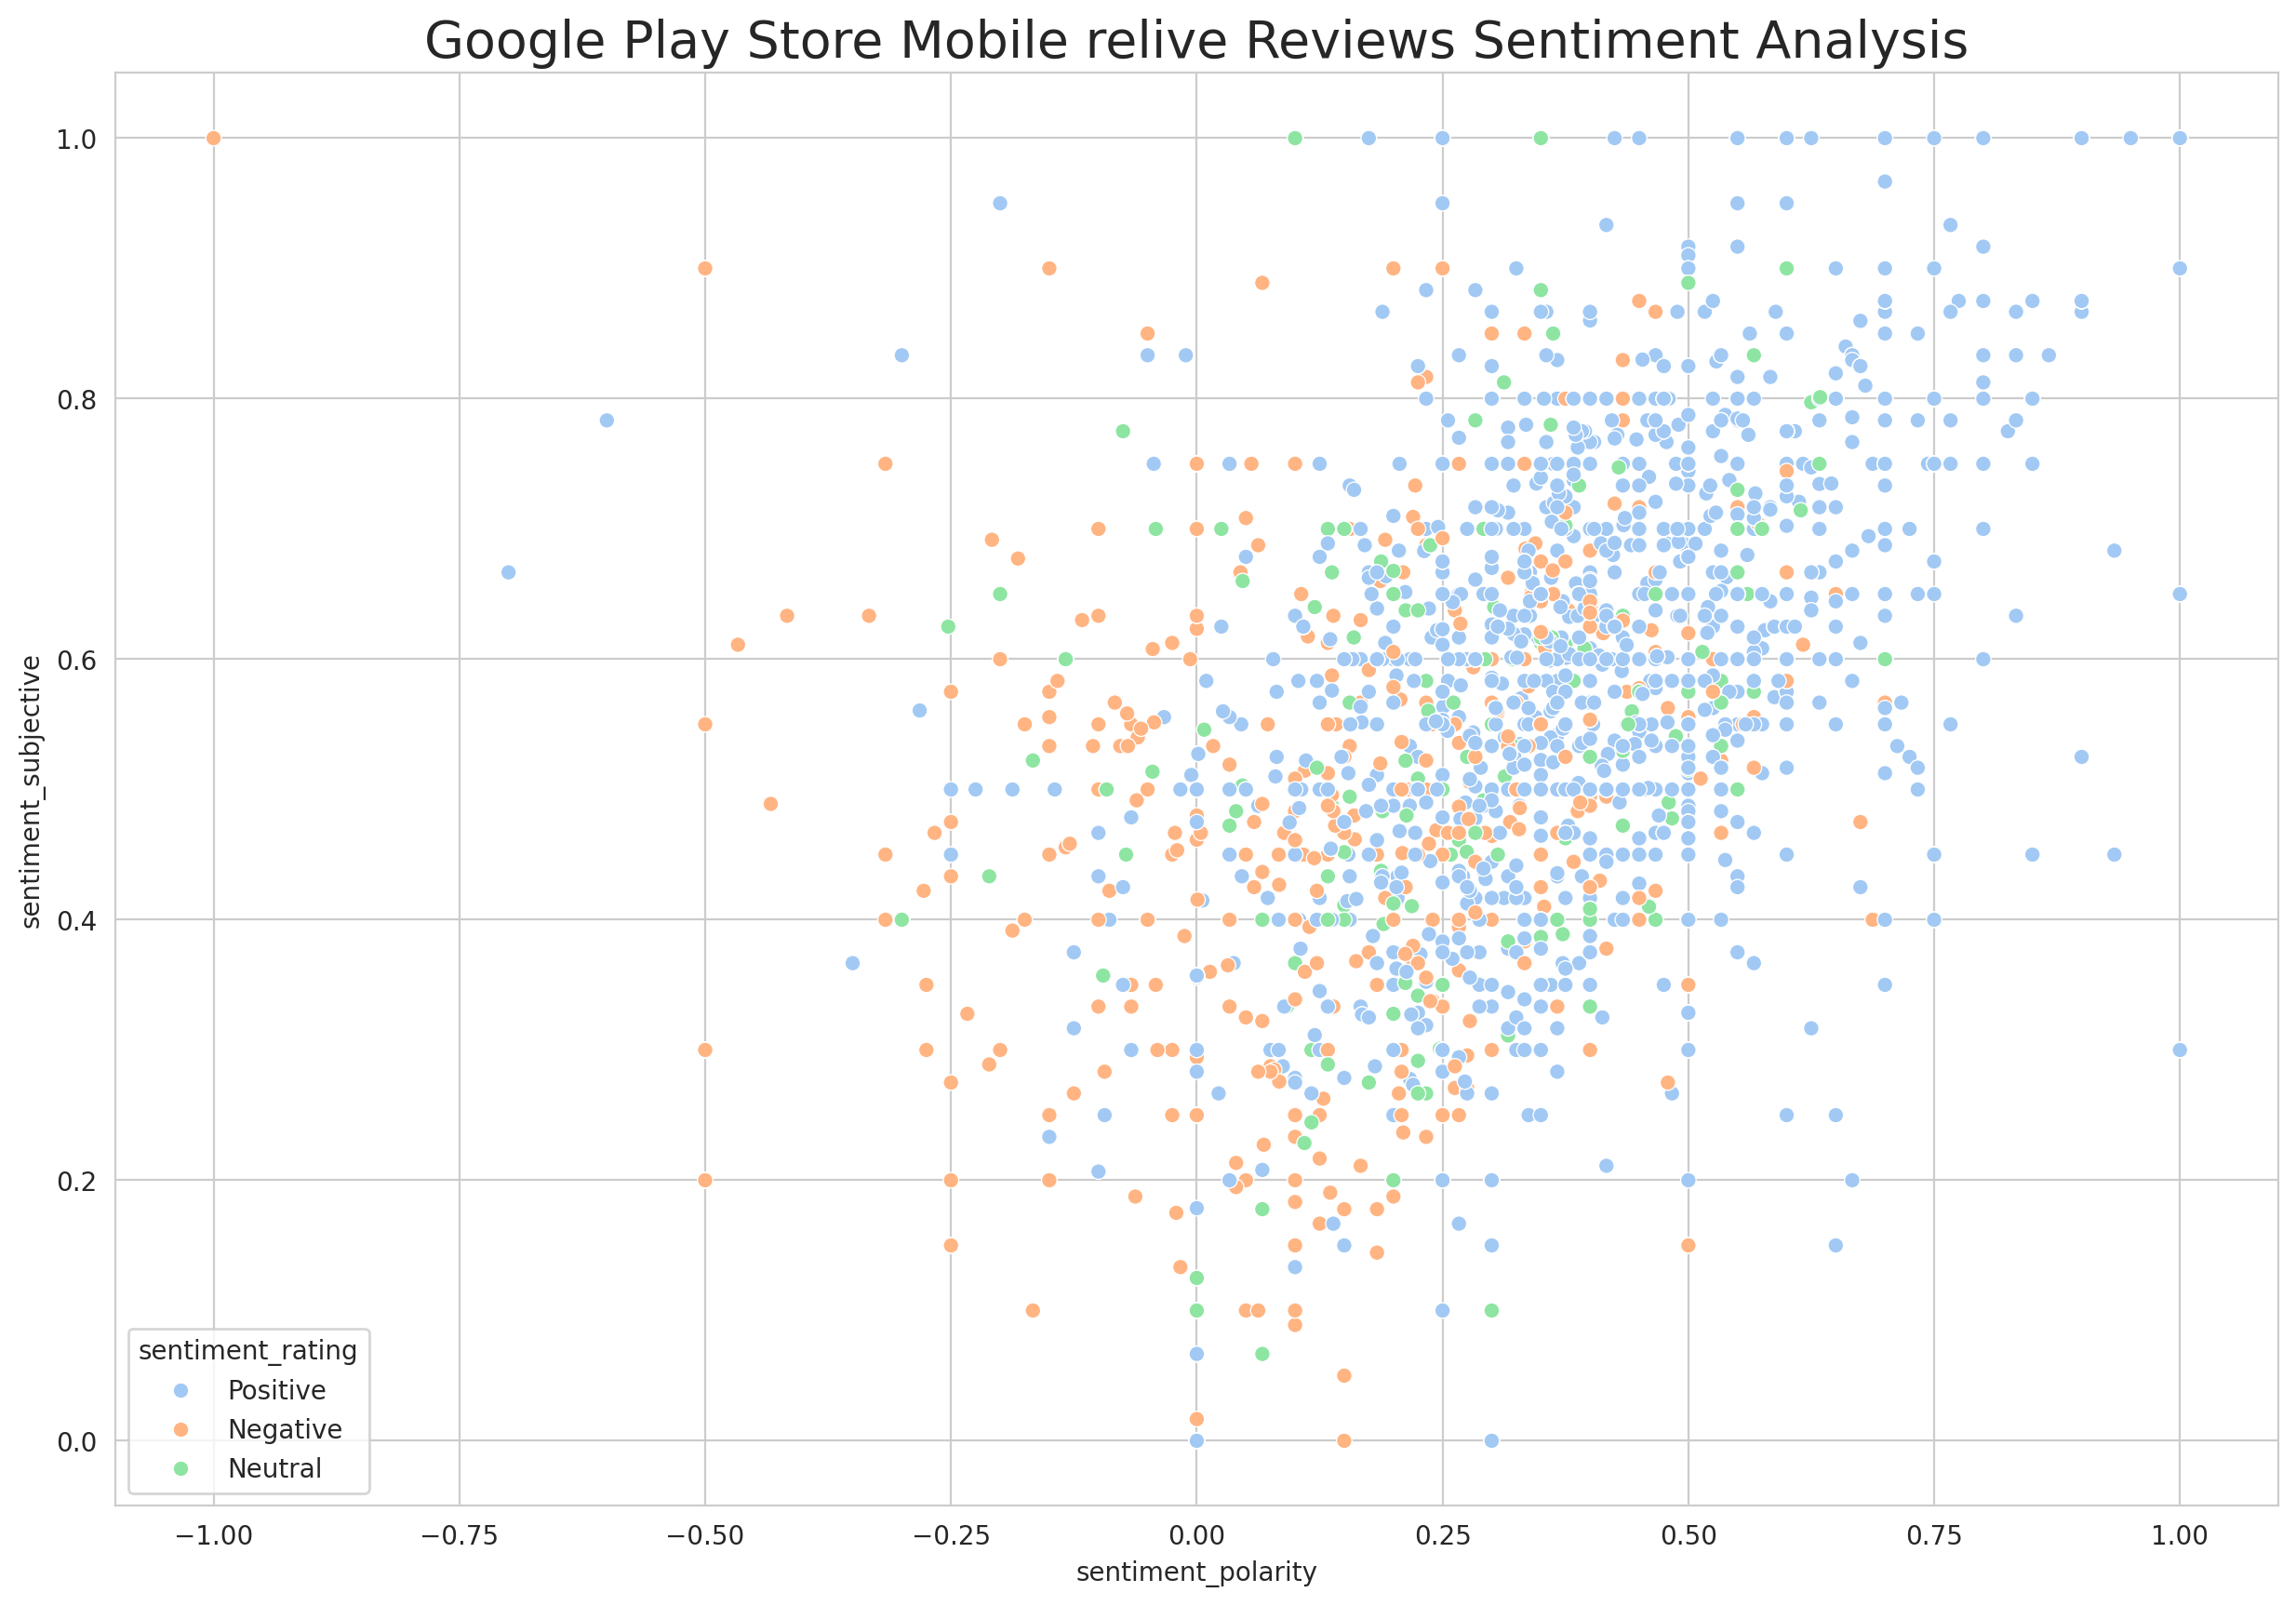

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
# Specify x and y using the 'x' and 'y' parameters within sns.scatterplot
sns.scatterplot(x=df_reliverev['sentiment_polarity'], y=df_reliverev['sentiment_subjective'],
                hue=df_reliverev['sentiment_rating'], edgecolor='white', palette="pastel")
plt.title("Google Play Store Mobile relive Reviews Sentiment Analysis", fontsize=20)
plt.show()

In [ ]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  #Import FreqDist from nltk.probability
  from nltk.probability import FreqDist
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms)
  plt.figure(figsize=(20,5))
  # Use the 'rainbow' colormap for the bar plot
  ax = sns.barplot(data=d, x= "word", y = "count", palette="rainbow")
  ax.set(ylabel = 'Count')
  plt.show()

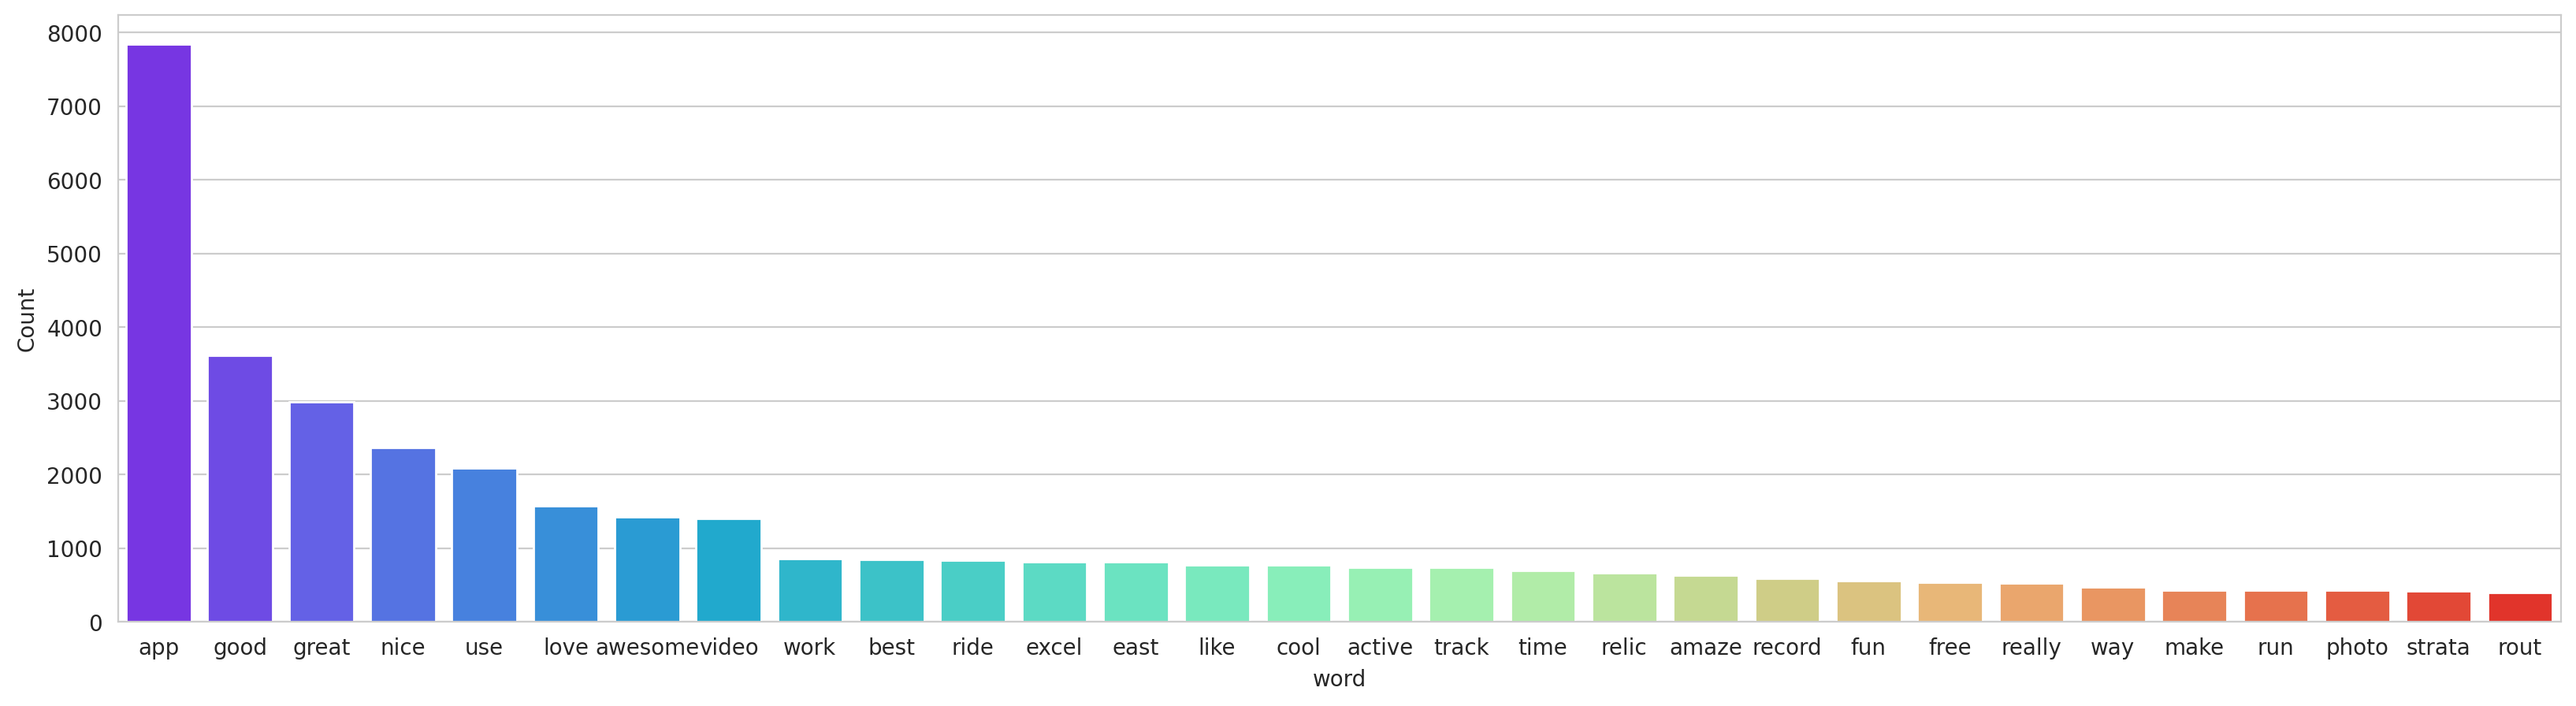

In [ ]:
freq_words(df_reliverev['spell_corrected_content_no_rare_no_common'])

Rating

In [ ]:

df_reliverev.loc[:,["spell_corrected_content_no_rare_no_common","score","thumbsUpCount", "reviewCreatedVersion", "at", "replyContent", "repliedAt"]]

spell_corrected_content_no_rare_no_common  score  thumbsUpCount  \
0            good app wish upgrade feature soon      4              0   
1                                         occur      4              0   
2          paid last year refund email absolute      2              0   
3                                good apply try      5              0   
4                                                    5              0   
...                                         ...    ...            ...   
21616                              awesome ride      5              0   
21617                                  far good      5              0   
21618                          love app fantast      5              0   
21619        brilliant need app relic thank guy      5              1   
21620                                     amaze      5              0   

      reviewCreatedVersion                  at replyContent repliedAt  
0                   5.57.0 2025-03-11 11:58:45          NaN       NaN  
1                   5.57.0 2025-03-11 00:24:19          NaN       NaN  
2                   5.57.0 2025-03-10 14:14:45          NaN       NaN  
3                   5.57.0 2025-03-10 12:45:46          NaN       NaN  
4                   5.57.0 2025-03-09 05:45:56          NaN       NaN  
...                    ...                 ...          ...       ...  
21616                  1.0 2017-03-26 05:55:08          NaN       NaN  
21617                  1.0 2017-03-26 01:39:03          NaN       NaN  
21618                  1.0 2017-03-25 08:24:47          NaN       NaN  
21619                  1.0 2017-03-23 18:20:09          NaN       NaN  
21620                  NaN 2017-03-23 15:06:19          NaN       NaN  

[21621 rows x 7 columns]

In [ ]:
df_reliverev['score'].value_counts()

score
5    16383
4     2578
1     1325
3      816
2      519
Name: count, dtype: int64

In [ ]:
# prompt: buatkan kode untuk save csv sebagai cleandata.csv

# Assuming df_reliverev is your DataFrame
df_reliverev.to_csv('cleandata.csv', index=False)


# To download the file to your local machine:
from google.colab import files
#files.download('cleandata.csv')


In [ ]:
df_reliverev

reviewId       userName  \
0      71f966cc-b905-4d92-9662-267512516332  A Google user   
1      7554edbe-d8bc-4a4a-aaa7-3d9c7112a493  A Google user   
2      2eaa87c0-38d1-4a23-a7c7-81a74dda90ca  A Google user   
3      bfecffd5-233c-48c0-8b70-7fc1cf66912a  A Google user   
4      d238c089-b972-4155-abdb-b26a5f285134  A Google user   
...                                     ...            ...   
21616  bf98d323-2b31-4df8-a3f7-446e0d00748e  A Google user   
21617  903af083-7b12-4708-bc25-31c779b4ff6d  A Google user   
21618  44ed2bef-eca5-4b36-93e2-dde154698632  A Google user   
21619  a77422c6-b008-484f-a1a8-5a816fbd9397  A Google user   
21620  cbc0006c-a2c2-49f3-8dff-974061c784d4  A Google user   

                                               userImage  \
0      https://play-lh.googleusercontent.com/EGemoI2N...   
1      https://play-lh.googleusercontent.com/EGemoI2N...   
2      https://play-lh.googleusercontent.com/EGemoI2N...   
3      https://play-lh.googleusercontent.com/EGemoI2N...   
4      https://play-lh.googleusercontent.com/EGemoI2N...   
...                                                  ...   
21616  https://play-lh.googleusercontent.com/EGemoI2N...   
21617  https://play-lh.googleusercontent.com/EGemoI2N...   
21618  https://play-lh.googleusercontent.com/EGemoI2N...   
21619  https://play-lh.googleusercontent.com/EGemoI2N...   
21620  https://play-lh.googleusercontent.com/EGemoI2N...   

                                                 content  score  \
0      Good app, but I wish for upgrade in UI and som...      4   
1                                       accurate details      4   
2      Paid for this last year at 50% off, its just r...      2   
3      It's a very good application for me, so try it...      5   
4                                                  Ohsem      5   
...                                                  ...    ...   
21616                         Awesome.. has all my rides      5   
21617                                 So far, very good.      5   
21618                        Love the app. Fantastic....      5   
21619  Brilliant, just what was needed adding the app...      5   
21620                                     It's amazing 😃      5   

       thumbsUpCount reviewCreatedVersion                  at replyContent  \
0                  0               5.57.0 2025-03-11 11:58:45          NaN   
1                  0               5.57.0 2025-03-11 00:24:19          NaN   
2                  0               5.57.0 2025-03-10 14:14:45          NaN   
3                  0               5.57.0 2025-03-10 12:45:46          NaN   
4                  0               5.57.0 2025-03-09 05:45:56          NaN   
...              ...                  ...                 ...          ...   
21616              0                  1.0 2017-03-26 05:55:08          NaN   
21617              0                  1.0 2017-03-26 01:39:03          NaN   
21618              0                  1.0 2017-03-25 08:24:47          NaN   
21619              1                  1.0 2017-03-23 18:20:09          NaN   
21620              0                  NaN 2017-03-23 15:06:19          NaN   

      repliedAt  ...                            spell_corrected_content  \
0           NaN  ...               good app wish upgrade i feature soon   
1           NaN  ...                                       occur detail   
2           NaN  ...  paid last year renew warn whatsoever refund ac...   
3           NaN  ...                              a good apply try folk   
4           NaN  ...                                               them   
...         ...  ...                                                ...   
21616       NaN  ...                                       awesome ride   
21617       NaN  ...                                           far good   
21618       NaN  ...                                   love app fantast   
21619       NaN  ...  brilliant need and app not paris team relic th...   
21

#EDA

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# visualization tools
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
# import pandas_profiling as pp
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df_reliverev.sample(5)

reviewId       userName  \
11024  ab86c28a-5490-47ab-962c-555142914385  A Google user   
2431   cd79446a-ced4-4b46-b4b3-e0f487284e28  A Google user   
11547  9ac473d3-7388-4f21-bd71-2c4fd74dca7d  A Google user   
1525   6bbfa5f5-452d-45ed-a762-5065f1796cfa  A Google user   
6312   a145c7d8-7686-40ad-9beb-af525178c302  A Google user   

                                               userImage  \
11024  https://play-lh.googleusercontent.com/EGemoI2N...   
2431   https://play-lh.googleusercontent.com/EGemoI2N...   
11547  https://play-lh.googleusercontent.com/EGemoI2N...   
1525   https://play-lh.googleusercontent.com/EGemoI2N...   
6312   https://play-lh.googleusercontent.com/EGemoI2N...   

                       content  score  thumbsUpCount reviewCreatedVersion  \
11024                  Awesome      5              0               3.19.0   
2431             user friendly      5              0               4.12.1   
11547                     Nice      4              0               3.16.0   
1525             Very accurate      5              0               5.22.0   
6312   Very good.. Happy..👍👍👍😂      5              0               3.55.1   

                       at replyContent repliedAt  ... spell_corrected_content  \
11024 2020-09-26 07:16:07          NaN       NaN  ...                 awesome   
2431  2022-10-16 05:28:22          NaN       NaN  ...           user friendly   
11547 2020-09-07 00:03:26          NaN       NaN  ...                    nice   
1525  2023-08-17 15:10:22          NaN       NaN  ...                   occur   
6312  2021-06-22 14:09:25          NaN       NaN  ...              good happy   

      spell_corrected_content_no_rare  \
11024                         awesome   
2431                    user friendly   
11547                            nice   
1525                            occur   
6312                       good happy   

      spell_corrected_content_no_rare_no_common sentiment_polarity  \
11024                                   awesome              1.000   
2431                              user friendly              0.375   
11547                                      nice              0.600   
1525                                      occur              0.000   
6312                                 good happy              0.750   

      sentiment_subjective sentiment_rating  year  \
11024                  1.0         Positive  2020   
2431                   0.5         Positive  2022   
11547                  1.0         Positive  2020   
1525                   0.0         Positive  2023   
6312                   0.8         Positive  2021   

                  filtered_content word_difference  \
11024                    [awesome]              {}   
2431              [user, friendly]              {}   
11547                       [nice]              {}   
1525                    [accurate]              {}   
6312   [good, .., happy, .., 👍👍👍😂]              {}   

         removed_stopwords_content  
11024                    [awesome]  
2431              [user, friendly]  
11547                       [nice]  
1525                    [accurate]  
6312   [good, .., happy, .., 👍👍👍😂]  

[5 rows x 28 columns]

In [ ]:
df_reliverev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21621 entries, 0 to 21620
Data columns (total 28 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   reviewId                                   21621 non-null  object        
 1   userName                                   21621 non-null  object        
 2   userImage                                  21621 non-null  object        
 3   content                                    21619 non-null  object        
 4   score                                      21621 non-null  int64         
 5   thumbsUpCount                              21621 non-null  int64         
 6   reviewCreatedVersion                       20363 non-null  object        
 7   at                                         21621 non-null  datetime64[ns]
 8   replyContent                               653 non-null    object        
 9   repliedAt        

In [ ]:
df_reliverev.isnull().sum()

reviewId                                         0
userName                                         0
userImage                                        0
content                                          2
score                                            0
thumbsUpCount                                    0
reviewCreatedVersion                          1258
at                                               0
replyContent                                 20968
repliedAt                                    20968
appVersion                                    1258
tokenized_content                                0
lower_tokenized_content                          0
content_no_stopwords                             0
lemmatized_content                               0
stemmed_content                                  0
cleaned_content                                  0
expanded_cleaned_content                         0
spell_corrected_content                          0
spell_corrected_content_no_rare                  0
spell_corrected_content_no_rare_no_common        0
sentiment_polarity                               0
sentiment_subjective                             0
sentiment_rating                                 0
year                                             0
filtered_content                                 0
word_difference                                  0
removed_stopwords_content                        0
dtype: int64

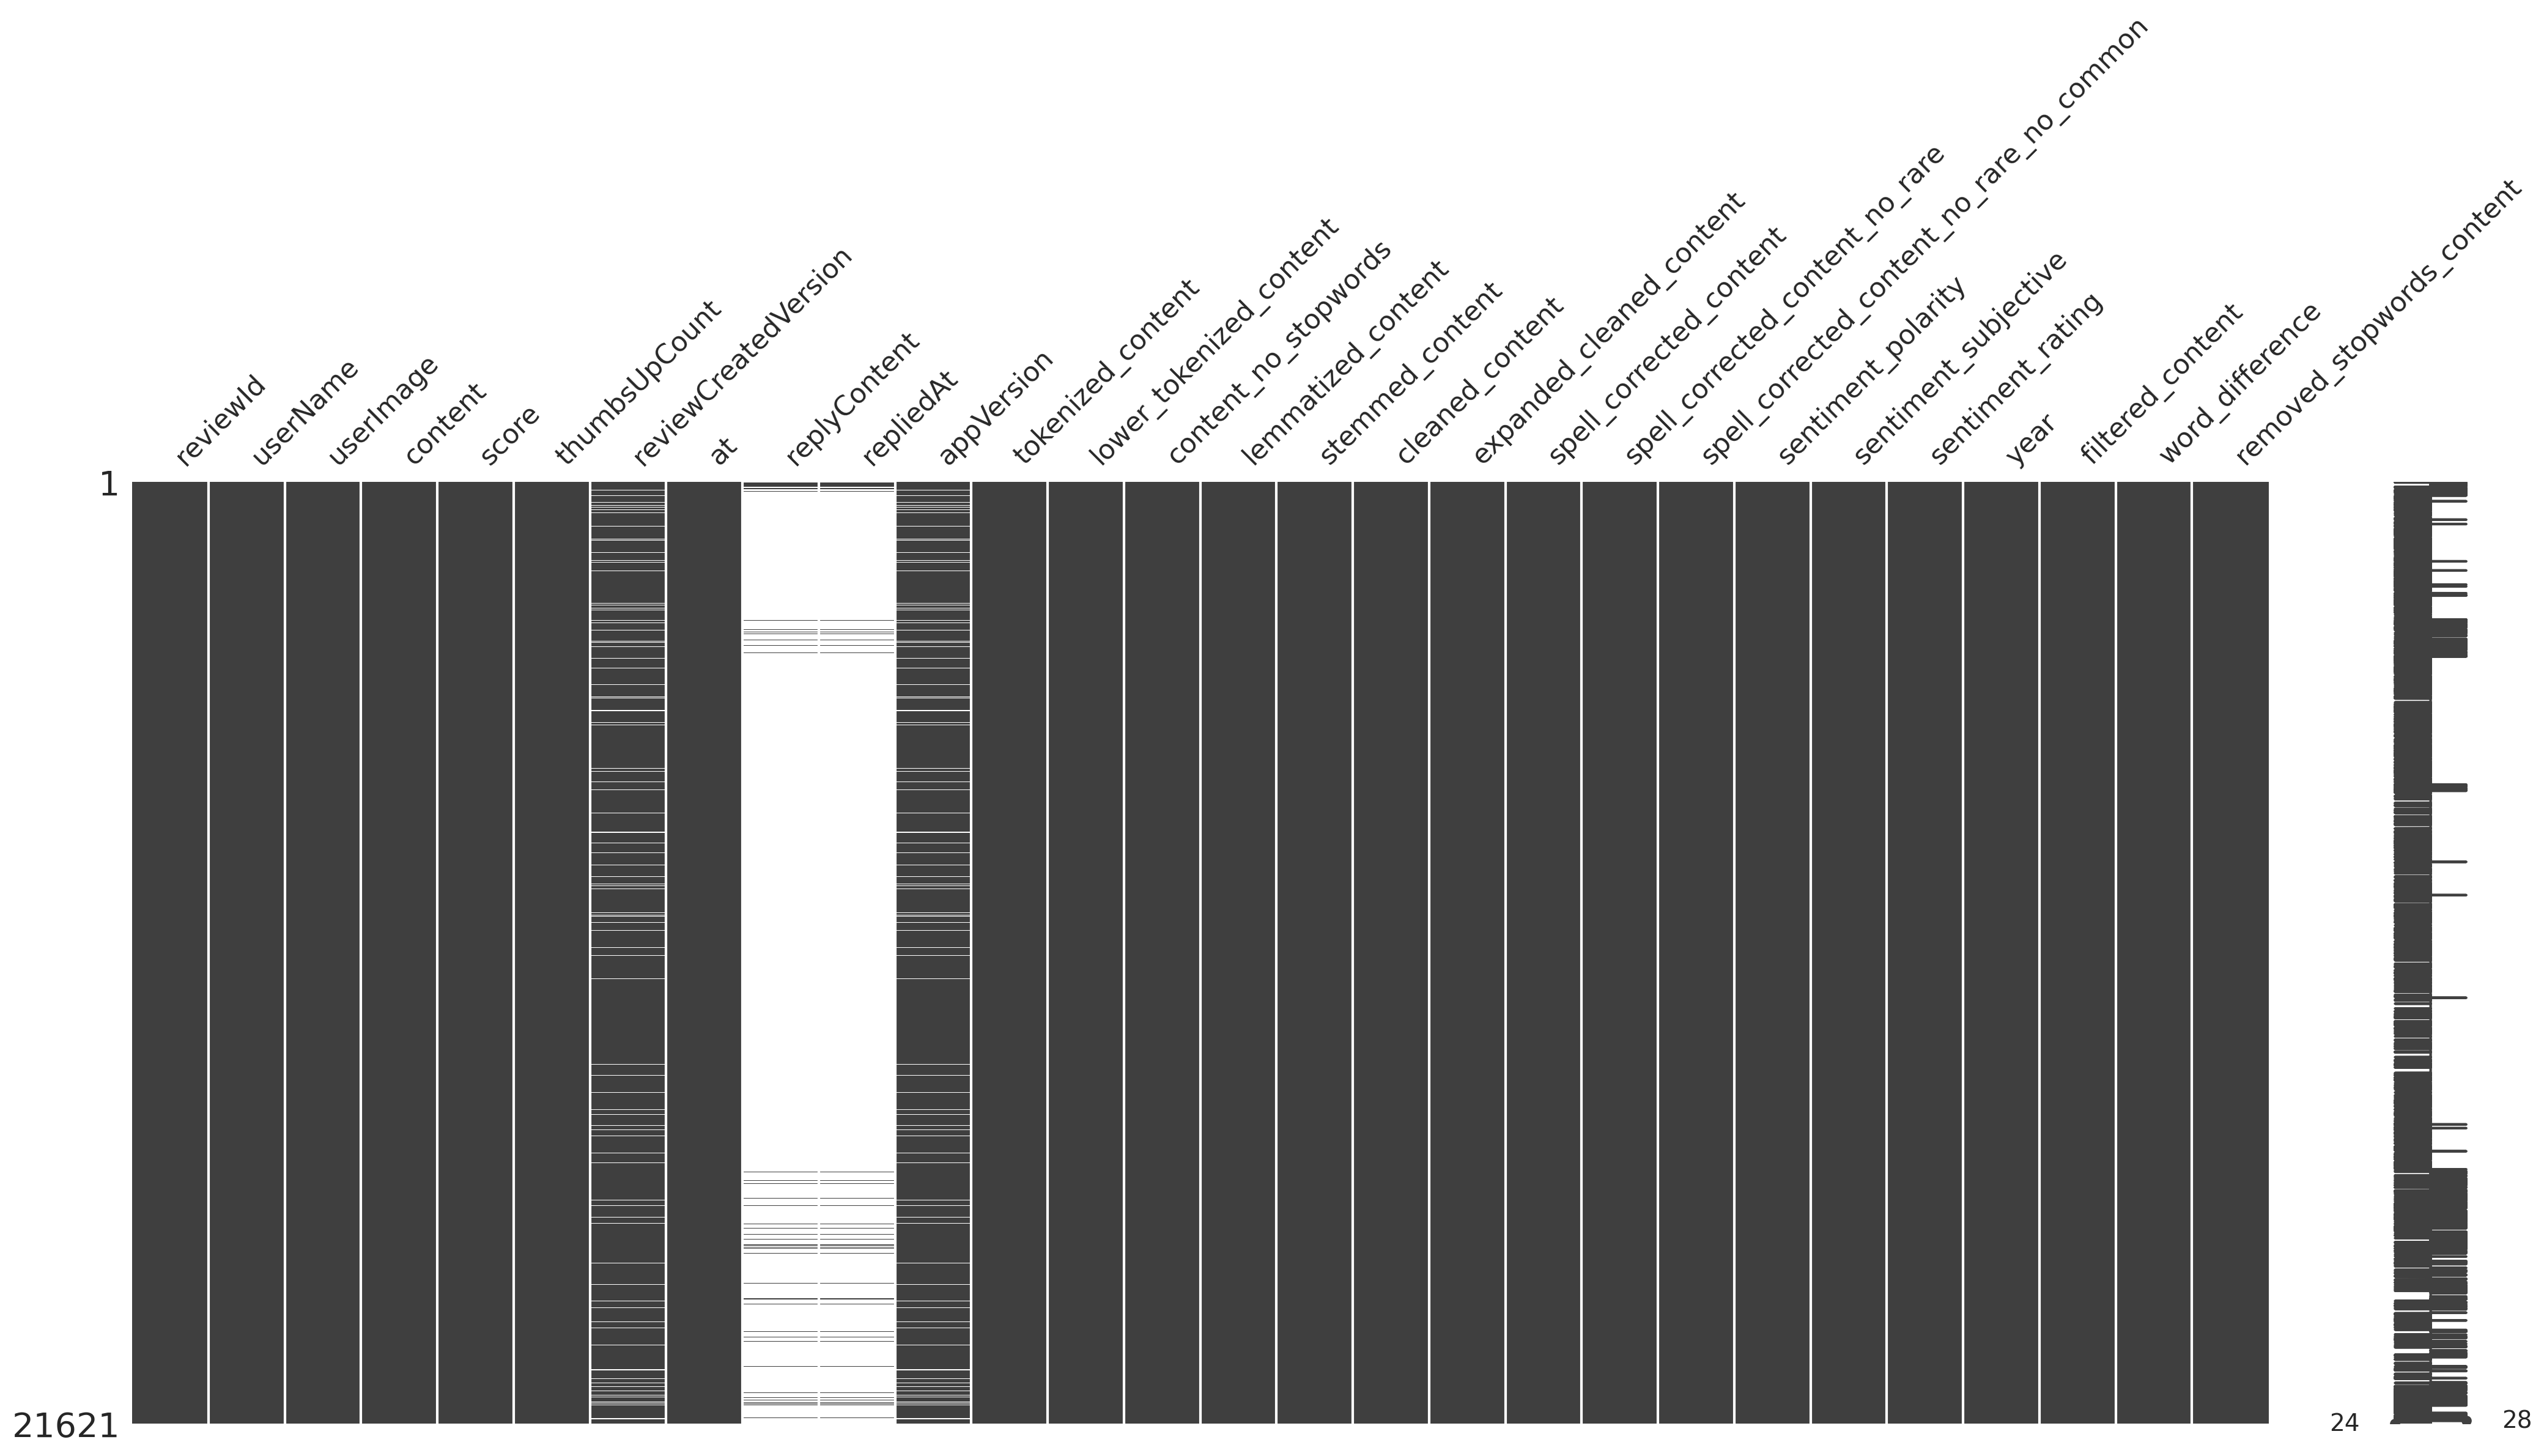

In [ ]:
import missingno as msno
msno.matrix(df_reliverev)
plt.show()

In [ ]:
# prompt: buatkan kode untuk menampilkan hanya kolom content, content terakhir hasil nlp, score, sentiment(positif negative), at, year

# Assuming 'df_reliverev' is your DataFrame
df_reliverev['at'] = pd.to_datetime(df_reliverev['at'])
df_reliverev['year'] = df_reliverev['at'].dt.year

# Select only the desired columns
df_selected = df_reliverev[['content', 'spell_corrected_content_no_rare_no_common', 'score', 'sentiment_rating', 'at', 'year']]

# Display the selected columns
df_selected


content  \
0      Good app, but I wish for upgrade in UI and som...   
1                                       accurate details   
2      Paid for this last year at 50% off, its just r...   
3      It's a very good application for me, so try it...   
4                                                  Ohsem   
...                                                  ...   
21616                         Awesome.. has all my rides   
21617                                 So far, very good.   
21618                        Love the app. Fantastic....   
21619  Brilliant, just what was needed adding the app...   
21620                                     It's amazing 😃   

      spell_corrected_content_no_rare_no_common  score sentiment_rating  \
0            good app wish upgrade feature soon      4         Positive   
1                                         occur      4         Positive   
2          paid last year refund email absolute      2         Negative   
3                                good apply try      5         Positive   
4                                                    5         Positive   
...                                         ...    ...              ...   
21616                              awesome ride      5         Positive   
21617                                  far good      5         Positive   
21618                          love app fantast      5         Positive   
21619        brilliant need app relic thank guy      5         Positive   
21620                                     amaze      5         Positive   

                       at  year  
0     2025-03-11 11:58:45  2025  
1     2025-03-11 00:24:19  2025  
2     2025-03-10 14:14:45  2025  
3     2025-03-10 12:45:46  2025  
4     2025-03-09 05:45:56  2025  
...                   ...   ...  
21616 2017-03-26 05:55:08  2017  
21617 2017-03-26 01:39:03  2017  
21618 2017-03-25 08:24:47  2017  
21619 2017-03-23 18:20:09  2017  
21620 2017-03-23 15:06:19  2017  

[21621 rows x 6 columns]

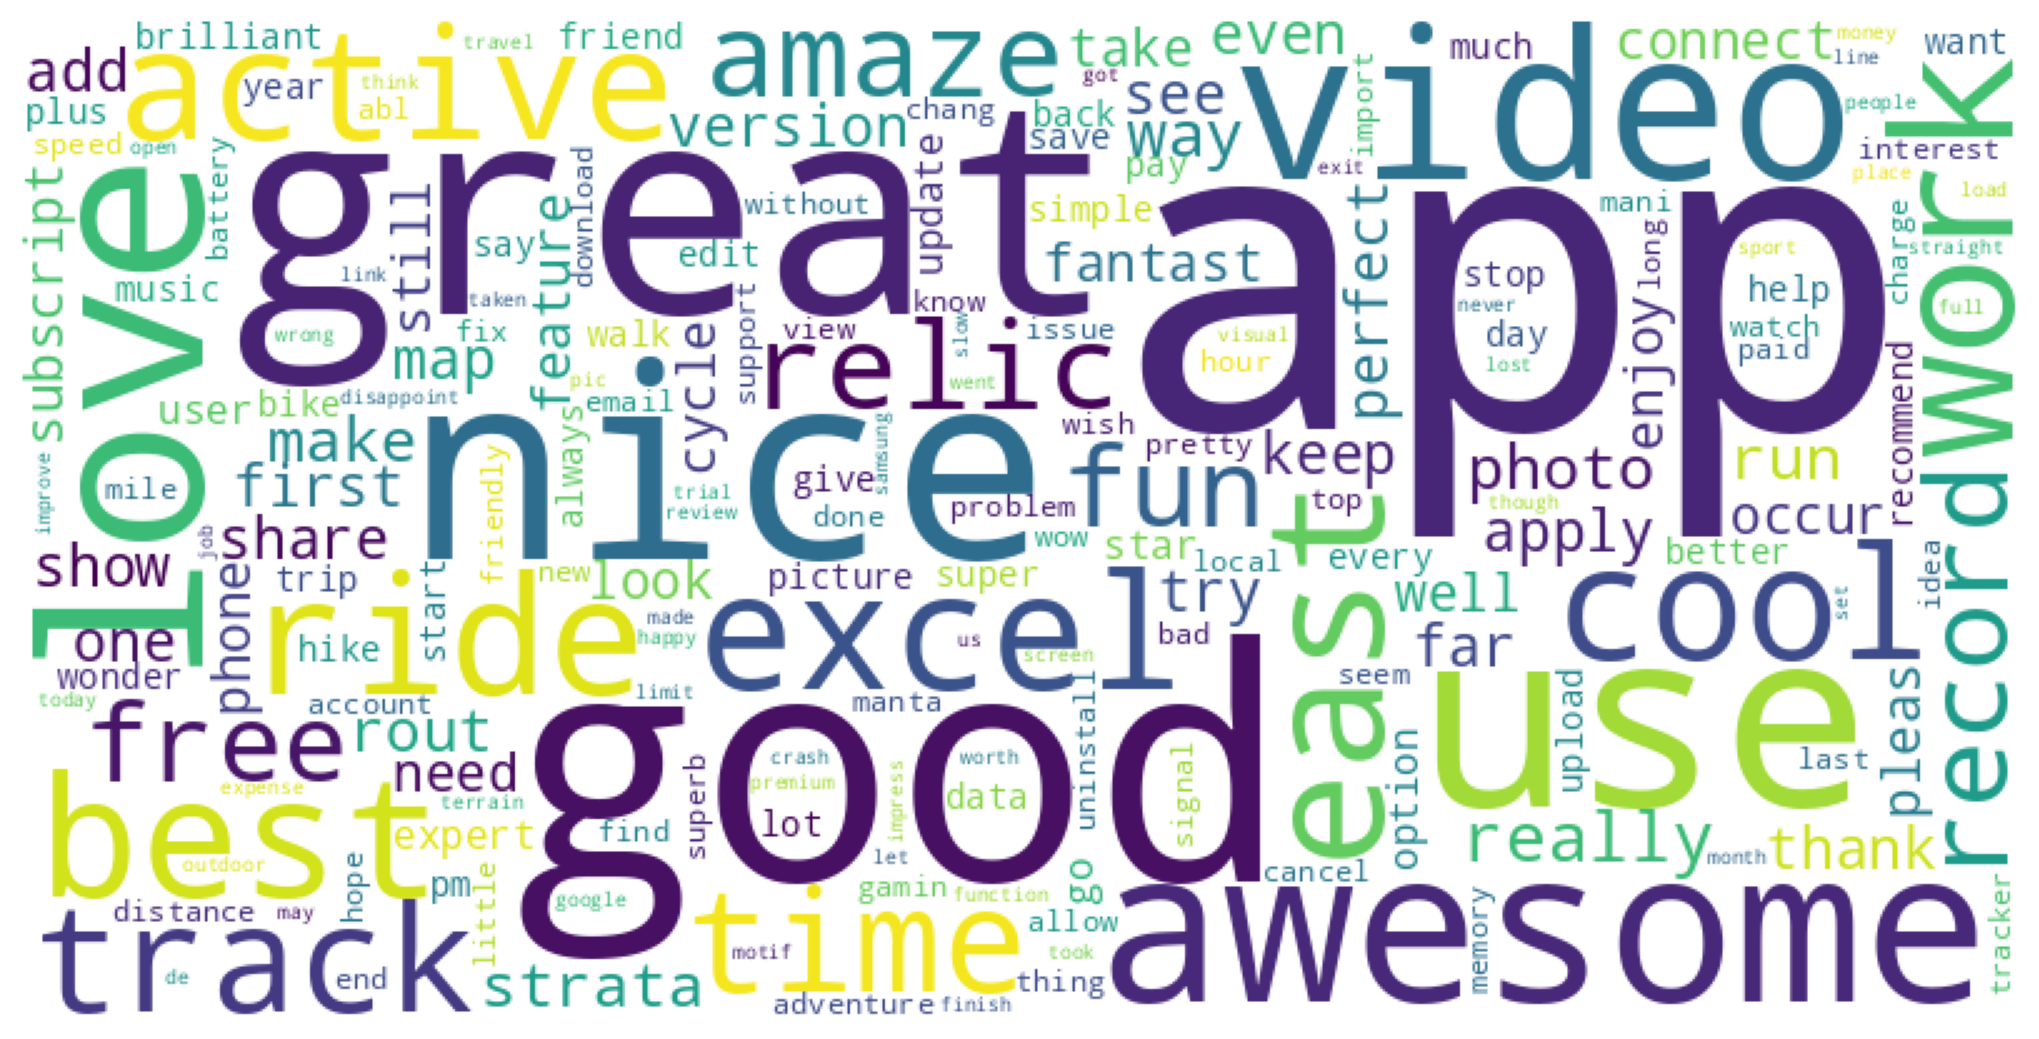

In [ ]:
# prompt: buatkan kode word cloud TANPA KEMUNCULAN DOUBLE misal great muncul 2 kali

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text data into a single string
all_text = ' '.join(df_reliverev['spell_corrected_content_no_rare_no_common'].dropna().astype(str))

# Create a WordCloud object with unique word functionality
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      collocations=False).generate(all_text)

# Display the generated image:
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


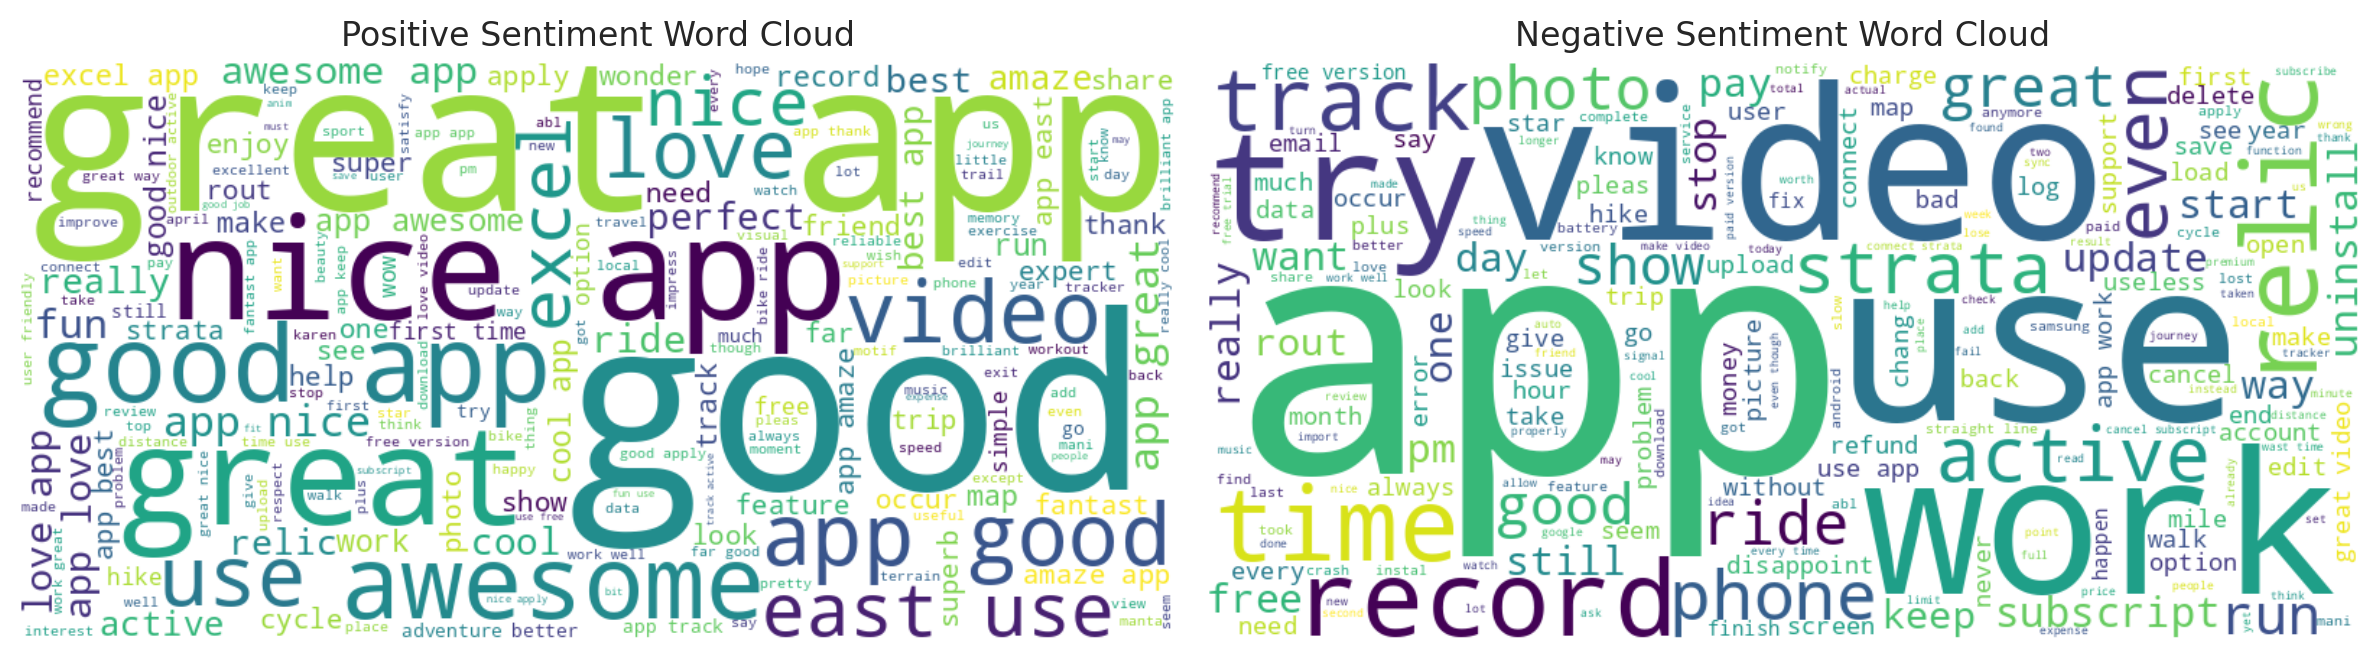

In [ ]:
# prompt: buatkan kode wordcloud untuk sentimen negatif dan positif secara terpisah

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate reviews into positive and negative sentiment groups
positive_reviews = df_reliverev[df_reliverev['sentiment_rating'] == 'Positive']['spell_corrected_content_no_rare_no_common'].astype(str)
negative_reviews = df_reliverev[df_reliverev['sentiment_rating'] == 'Negative']['spell_corrected_content_no_rare_no_common'].astype(str)

# Create word clouds for positive and negative sentiments
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_reviews))
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_reviews))

# Display the word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis("off")

plt.tight_layout()
plt.show()


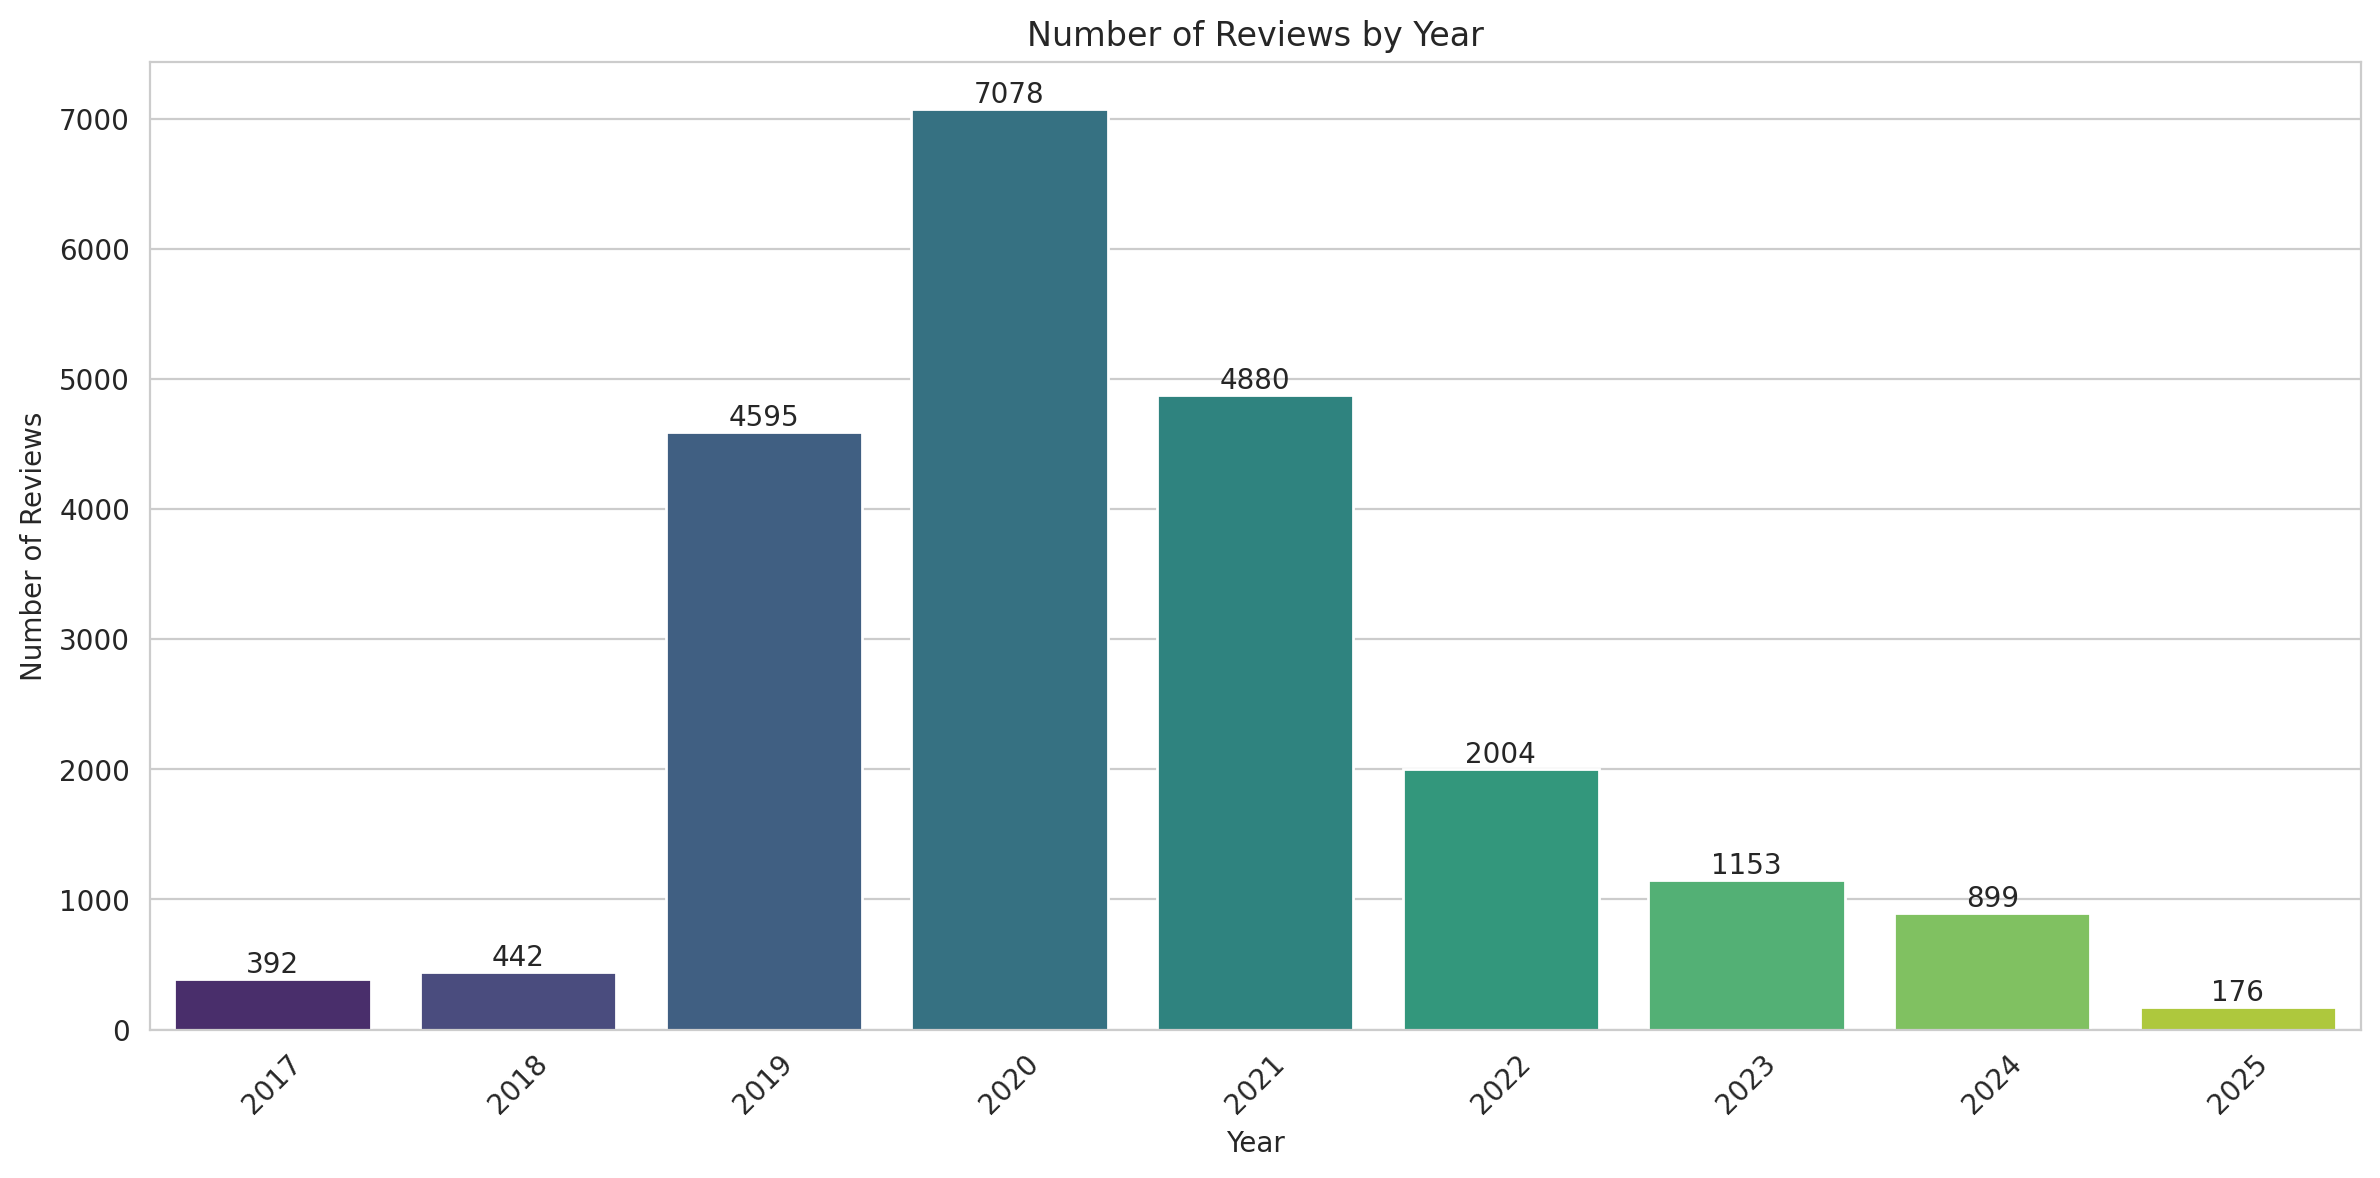

In [ ]:
# prompt: buatkan grafik barplot number of reviews berdasarkan tahun, gunakan kombinasi warna bar yang menarik bisa gradasi sesuaikan warna bar dengan tingkat jumlah review yang diperoleh

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df_reliverev' is your DataFrame and 'year' column exists

# Group by year and count the number of reviews
reviews_by_year = df_reliverev.groupby('year')['content'].count()

# Create the barplot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=reviews_by_year.index, y=reviews_by_year.values, palette="viridis")  # Use 'viridis' for a gradient colormap

# Customize the plot
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.title("Number of Reviews by Year")

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


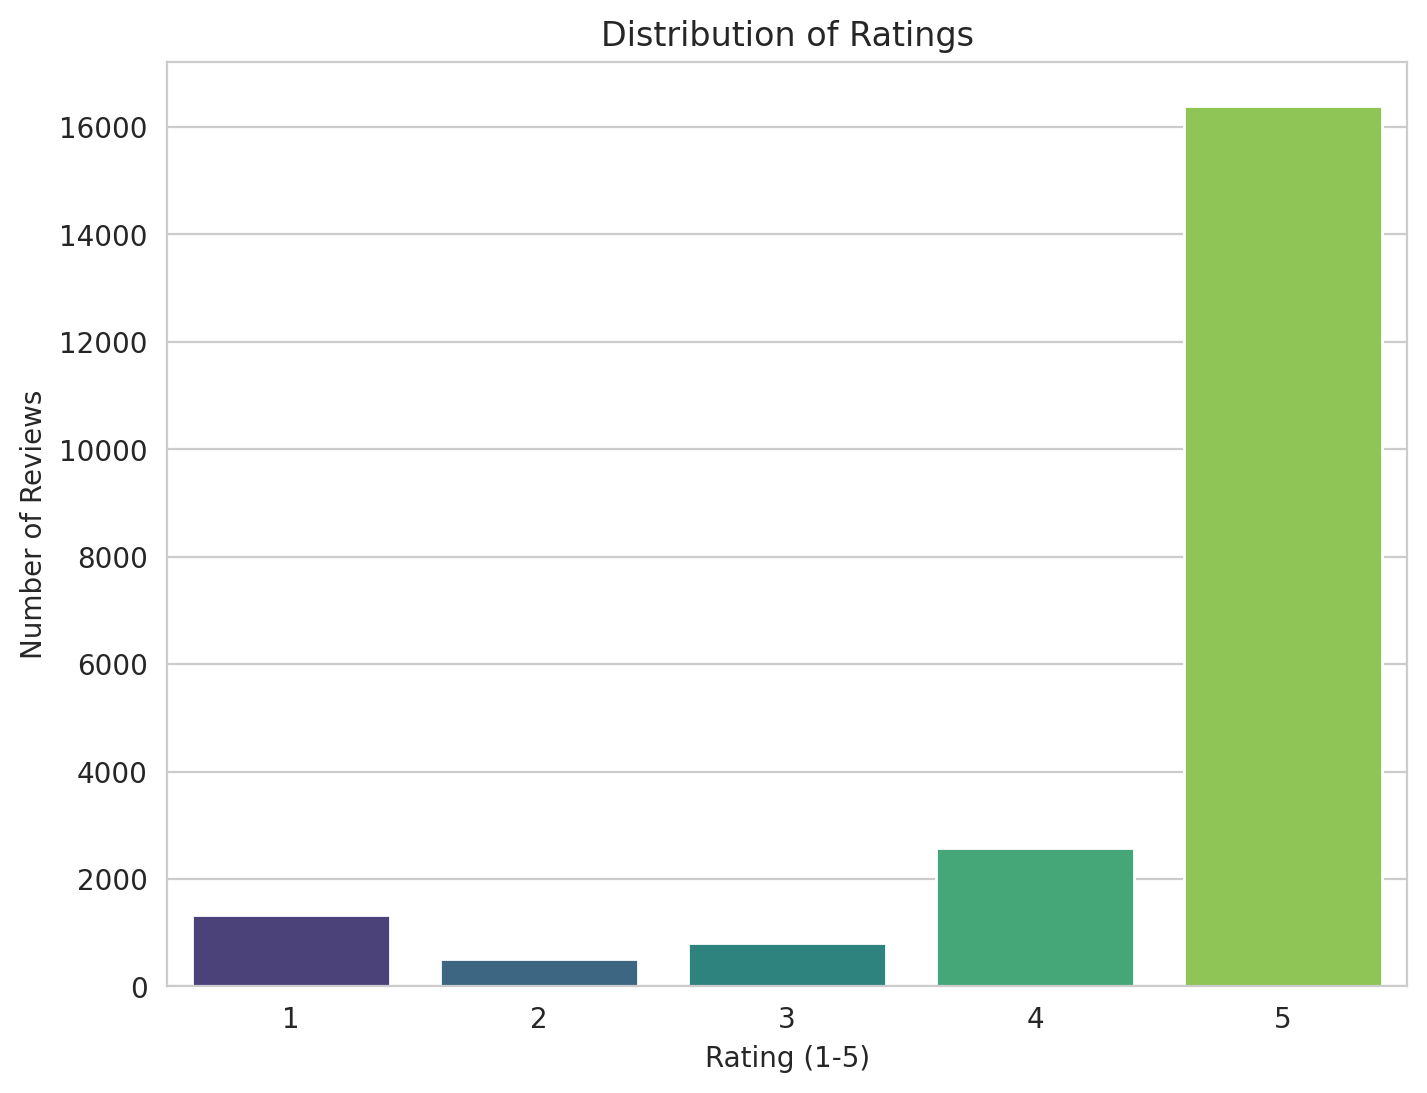

In [ ]:
# prompt: buatkan histogram yang menunjukan data rating scale 1-5 dengan respon nya. gunakan template chart dengan tema warna yang bagus

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df_reliverev' is your DataFrame and 'score' column contains the ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='score', data=df_reliverev, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating (1-5)')
plt.ylabel('Number of Reviews')
plt.show()
